Análisis de experimento

Carga de librerías

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Carga de datos a utilizar: se trata de los datos de los usuarios y el dataframe sobre su comportamiento

In [3]:
df_users=pd.read_csv ("Proyectos semanales/Vanguard/df_users.txt") 
df_beh=pd.read_csv ("Proyectos semanales/Vanguard/df_data.txt")

In [42]:
#df_final_demo.to_csv('Proyectos semanales/Vanguard/df_final_demo.txt', index=False)

In [4]:
#Identificamos los usuarios de grupo de test, control e indefinidos
variation_counts = df_users['Variation'].value_counts().sort_index()
variation_counts

Variation
Control    23532
Test       26968
UN         20109
Name: count, dtype: int64

Vamos a eliminar al grupo UN, que no forman parte del experimento

In [7]:
df_users_experiment = df_users[df_users['Variation'] != 'UN']

In [8]:
df_users_experiment

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation,age_category,type_client,old
0,836976,6,73,60,U,2,45105.30,6,9,Test,Senior (56-75 años),Bronce,Intermedio
1,2304905,7,94,58,U,2,110860.30,6,9,Control,Senior (56-75 años),Plata,Intermedio
2,1439522,5,64,32,U,2,52467.79,6,9,Test,Joven (19-35 años),Plata,Intermedio
3,1562045,16,198,49,M,2,67454.65,3,6,Test,Adulto (36-55 años),Plata,Establecido
4,5126305,12,145,33,F,2,103671.75,0,3,Control,Joven (19-35 años),Plata,Establecido
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50495,1780858,21,262,68,M,3,372100.59,6,9,Test,Senior (56-75 años),Oro,Veterano
50496,6967120,21,260,68,M,3,4279873.38,6,9,Control,Senior (56-75 años),Platino,Veterano
50497,5826160,20,249,56,F,2,44837.16,2,5,Test,Senior (56-75 años),Bronce,Veterano
50498,8739285,19,229,69,F,2,44994.24,1,4,Test,Senior (56-75 años),Bronce,Establecido


Conociendo a los clientes del experimento

In [10]:
gendr_ex_counts = df_users_experiment['gendr'].value_counts().sort_index()
gendr_ex_counts

gendr
F    16259
M    16947
U    17294
Name: count, dtype: int64

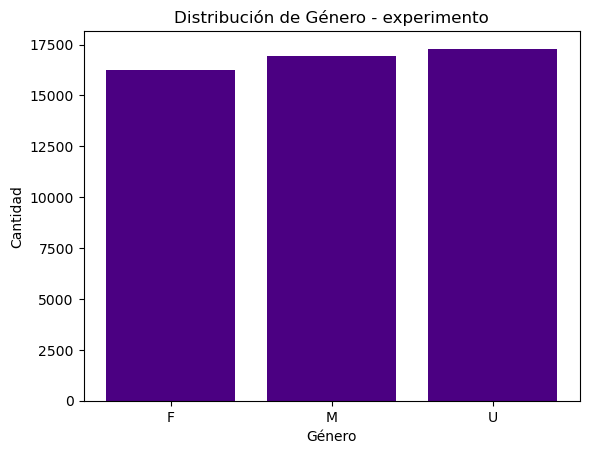

In [21]:
plt.bar(gendr_ex_counts.index, gendr_ex_counts.values, color='indigo')
plt.title('Distribución de Género - experimento')
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.xticks(rotation=0)  
plt.show()


In [12]:
type_ex_client_counts = df_users_experiment['type_client'].value_counts().sort_index()
type_ex_client_counts

type_client
Bronce     18557
Oro        11322
Plata      20225
Platino      396
Name: count, dtype: int64

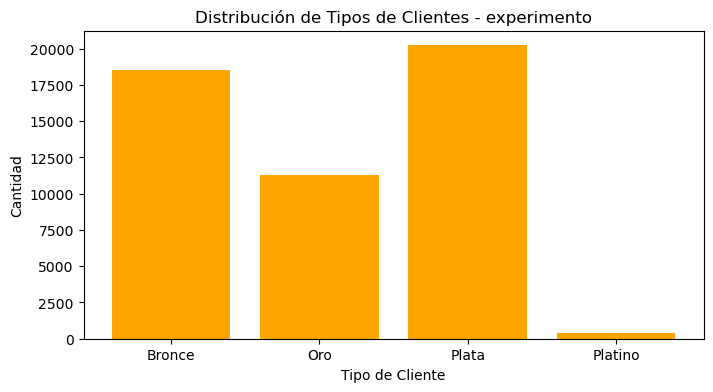

In [22]:
plt.figure(figsize=(8, 4))  
plt.bar(type_ex_client_counts.index, type_ex_client_counts.values, color='orange')  

# Añadir título y etiquetas 
plt.title('Distribución de Tipos de Clientes - experimento')
plt.xlabel('Tipo de Cliente')
plt.ylabel('Cantidad')

# Mostrar la gráfica
plt.show()


In [15]:
old_ex_counts = df_users_experiment['old'].value_counts().sort_index()
old_ex_counts

old
Establecido    19763
Intermedio     18869
Nuevo           3791
Veterano        8077
Name: count, dtype: int64

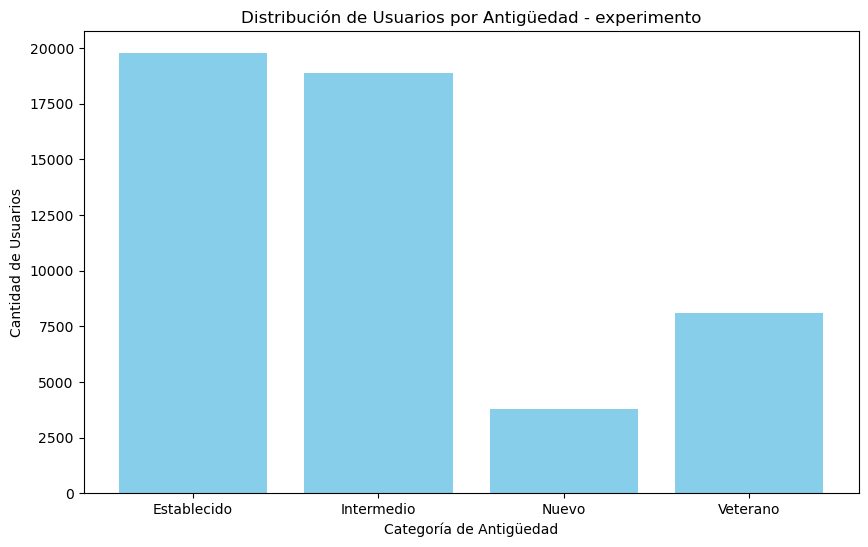

In [24]:
plt.figure(figsize=(10, 6))  
plt.bar(old_ex_counts.index, old_ex_counts.values, color='skyblue')

# Título y etiquetas a los ejes
plt.title('Distribución de Usuarios por Antigüedad - experimento')
plt.xlabel('Categoría de Antigüedad')
plt.ylabel('Cantidad de Usuarios')

# Mostrar la gráfica
plt.show()


In [18]:
num_ex_accts_counts = df_users_experiment['num_accts'].value_counts().sort_index()
num_ex_accts_counts

num_accts
0       12
1        1
2    39721
3     8947
4     1585
5      205
6       23
7        6
Name: count, dtype: int64

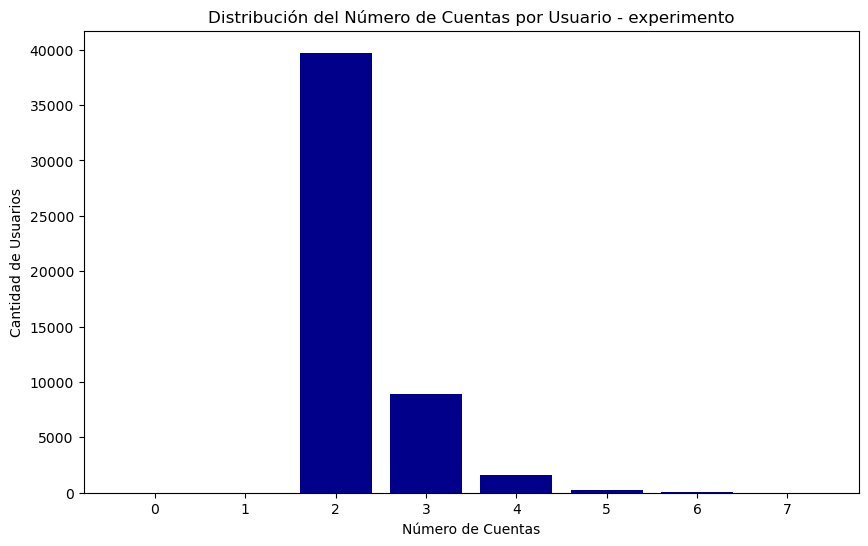

In [23]:
plt.figure(figsize=(10, 6))  
plt.bar(num_ex_accts_counts.index, num_ex_accts_counts.values, color='darkblue')  

# Título y etiquetas a los ejes
plt.title('Distribución del Número de Cuentas por Usuario - experimento')
plt.xlabel('Número de Cuentas')
plt.ylabel('Cantidad de Usuarios')

# Mejorar la visualización en el eje X
plt.xticks(range(0, max(num_ex_accts_counts.index)+1))  # Asegura que todos los números de cuentas aparezcan como ticks

# Mostrar la gráfica
plt.show()


In [71]:
#df_users.to_csv('Proyectos semanales/Vanguard/df_users.txt', index=False)

In [75]:
#process_df_test.to_csv('Proyectos semanales/Proyecto 2/process_df_test.txt', index=False)

In [27]:
#creamos un df con solo los usuarios del control
df_control = df_users_experiment[df_users_experiment['Variation'] == 'Control']
df_control

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation,age_category,type_client,old
1,2304905,7,94,58,U,2,110860.30,6,9,Control,Senior (56-75 años),Plata,Intermedio
4,5126305,12,145,33,F,2,103671.75,0,3,Control,Joven (19-35 años),Plata,Establecido
5,3727881,5,71,30,U,2,23915.60,0,3,Control,Joven (19-35 años),Bronce,Intermedio
6,272934,5,66,58,U,2,27021.42,2,5,Control,Senior (56-75 años),Bronce,Intermedio
8,285619,30,369,67,M,2,299388.72,3,6,Control,Senior (56-75 años),Oro,Veterano
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50486,6662941,7,84,36,F,2,83101.84,4,7,Control,Adulto (36-55 años),Plata,Intermedio
50491,2787512,23,283,48,F,3,123618.60,1,4,Control,Adulto (36-55 años),Plata,Veterano
50493,9932367,23,280,57,F,2,94466.55,6,9,Control,Senior (56-75 años),Plata,Veterano
50494,4079649,23,276,62,M,3,57575.28,4,7,Control,Senior (56-75 años),Plata,Veterano


In [29]:
gendr_cont_counts = df_control['gendr'].value_counts().sort_index()
gendr_cont_counts

gendr
F    7543
M    7970
U    8019
Name: count, dtype: int64

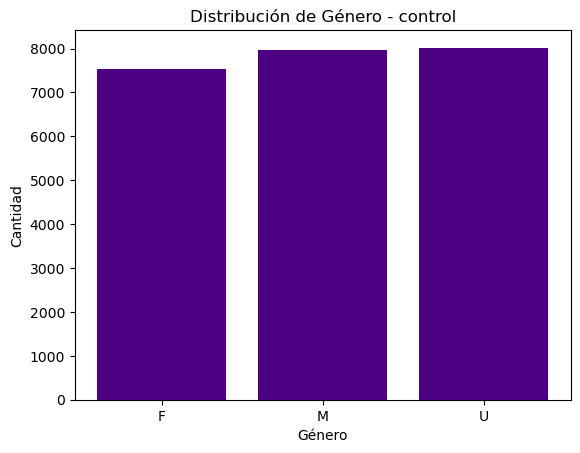

In [30]:
plt.bar(gendr_cont_counts.index, gendr_cont_counts.values, color='indigo')
plt.title('Distribución de Género - control')
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.xticks(rotation=0)  
plt.show()

In [31]:
type_cont_client_counts = df_control['type_client'].value_counts().sort_index()
type_cont_client_counts

type_client
Bronce     8550
Oro        5294
Plata      9502
Platino     186
Name: count, dtype: int64

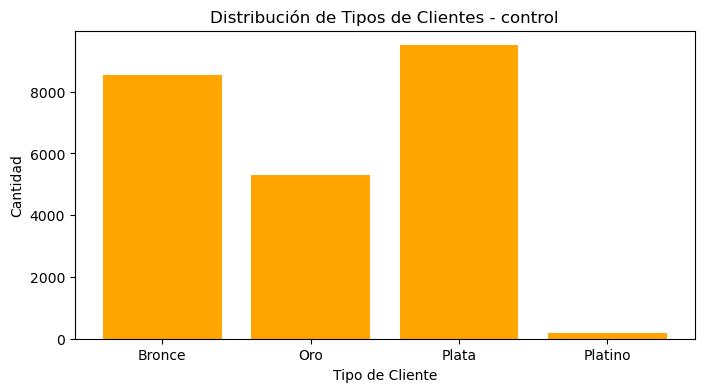

In [34]:
plt.figure(figsize=(8, 4))  
plt.bar(type_cont_client_counts.index, type_cont_client_counts.values, color='orange')  

# Añadir título y etiquetas 
plt.title('Distribución de Tipos de Clientes - control')
plt.xlabel('Tipo de Cliente')
plt.ylabel('Cantidad')

# Mostrar la gráfica
plt.show()

In [33]:
old_cont_counts = df_control['old'].value_counts().sort_index()
old_cont_counts

old
Establecido    9249
Intermedio     8713
Nuevo          1751
Veterano       3819
Name: count, dtype: int64

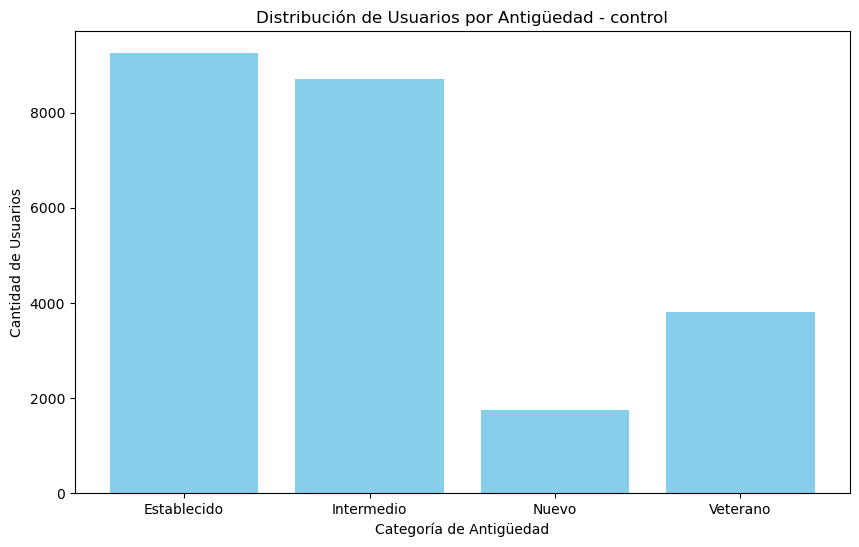

In [35]:
plt.figure(figsize=(10, 6))  
plt.bar(old_cont_counts.index, old_cont_counts.values, color='skyblue')

# Título y etiquetas a los ejes
plt.title('Distribución de Usuarios por Antigüedad - control')
plt.xlabel('Categoría de Antigüedad')
plt.ylabel('Cantidad de Usuarios')

# Mostrar la gráfica
plt.show()

In [36]:
num_cont_accts_counts = df_control['num_accts'].value_counts().sort_index()
num_cont_accts_counts

num_accts
0        5
2    18411
3     4251
4      745
5      108
6       10
7        2
Name: count, dtype: int64

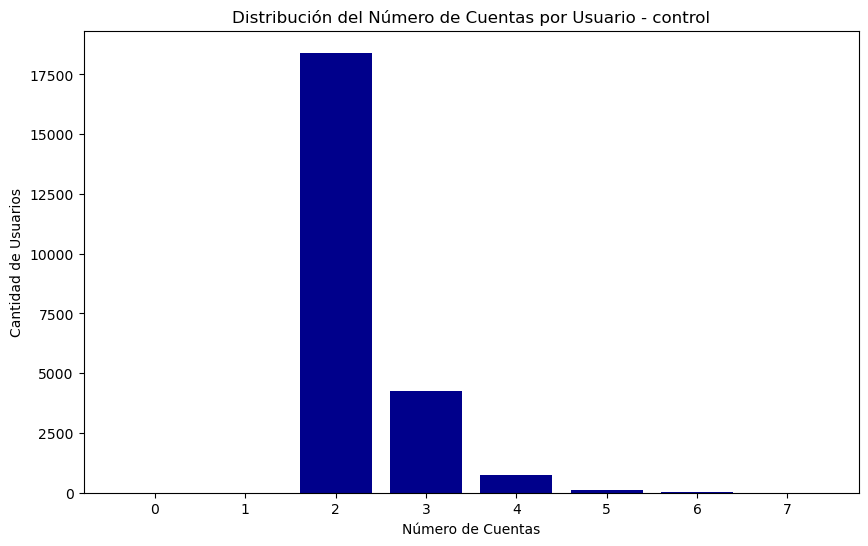

In [37]:
plt.figure(figsize=(10, 6))  
plt.bar(num_cont_accts_counts.index, num_cont_accts_counts.values, color='darkblue')  

# Título y etiquetas a los ejes
plt.title('Distribución del Número de Cuentas por Usuario - control')
plt.xlabel('Número de Cuentas')
plt.ylabel('Cantidad de Usuarios')

# Mejorar la visualización en el eje X
plt.xticks(range(0, max(num_ex_accts_counts.index)+1))  # Asegura que todos los números de cuentas aparezcan como ticks

# Mostrar la gráfica
plt.show()

Analisis de los usuarios que si vieron el test

In [28]:
df_test = df_users_experiment[df_users_experiment['Variation'] == 'Test']
df_test

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation,age_category,type_client,old
0,836976,6,73,60,U,2,45105.30,6,9,Test,Senior (56-75 años),Bronce,Intermedio
2,1439522,5,64,32,U,2,52467.79,6,9,Test,Joven (19-35 años),Plata,Intermedio
3,1562045,16,198,49,M,2,67454.65,3,6,Test,Adulto (36-55 años),Plata,Establecido
7,388801,30,361,57,M,5,522498.72,1,4,Test,Senior (56-75 años),Oro,Veterano
9,8198645,15,189,54,F,2,382303.83,6,9,Test,Adulto (36-55 años),Oro,Establecido
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50492,501496,23,281,35,F,2,32529.34,0,3,Test,Joven (19-35 años),Bronce,Veterano
50495,1780858,21,262,68,M,3,372100.59,6,9,Test,Senior (56-75 años),Oro,Veterano
50497,5826160,20,249,56,F,2,44837.16,2,5,Test,Senior (56-75 años),Bronce,Veterano
50498,8739285,19,229,69,F,2,44994.24,1,4,Test,Senior (56-75 años),Bronce,Establecido


In [38]:
gendr_test_counts = df_test['gendr'].value_counts().sort_index()
gendr_test_counts

gendr
F    8716
M    8977
U    9275
Name: count, dtype: int64

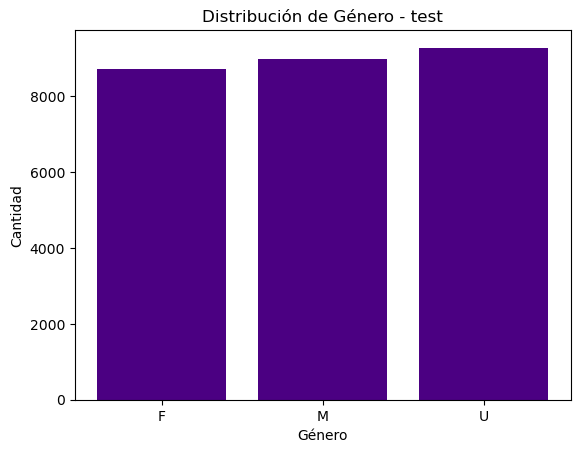

In [40]:
plt.bar(gendr_test_counts.index, gendr_test_counts.values, color='indigo')
plt.title('Distribución de Género - test')
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.xticks(rotation=0)  
plt.show()

In [41]:
type_test_client_counts = df_test['type_client'].value_counts().sort_index()
type_test_client_counts

type_client
Bronce     10007
Oro         6028
Plata      10723
Platino      210
Name: count, dtype: int64

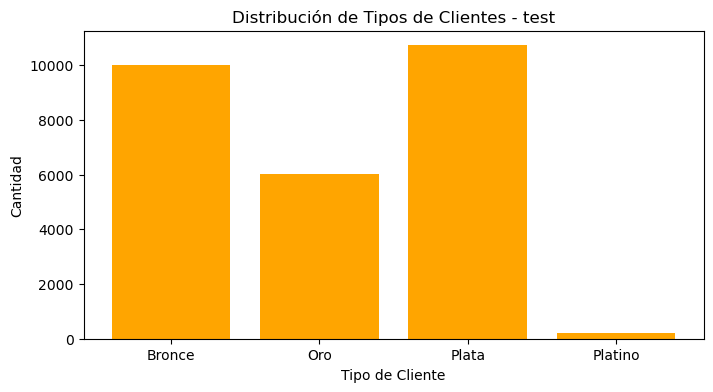

In [43]:
plt.figure(figsize=(8, 4))  
plt.bar(type_test_client_counts.index, type_test_client_counts.values, color='orange')  

# Añadir título y etiquetas 
plt.title('Distribución de Tipos de Clientes - test')
plt.xlabel('Tipo de Cliente')
plt.ylabel('Cantidad')

# Mostrar la gráfica
plt.show()

In [44]:
old_test_counts = df_test['old'].value_counts().sort_index()
old_test_counts

old
Establecido    10514
Intermedio     10156
Nuevo           2040
Veterano        4258
Name: count, dtype: int64

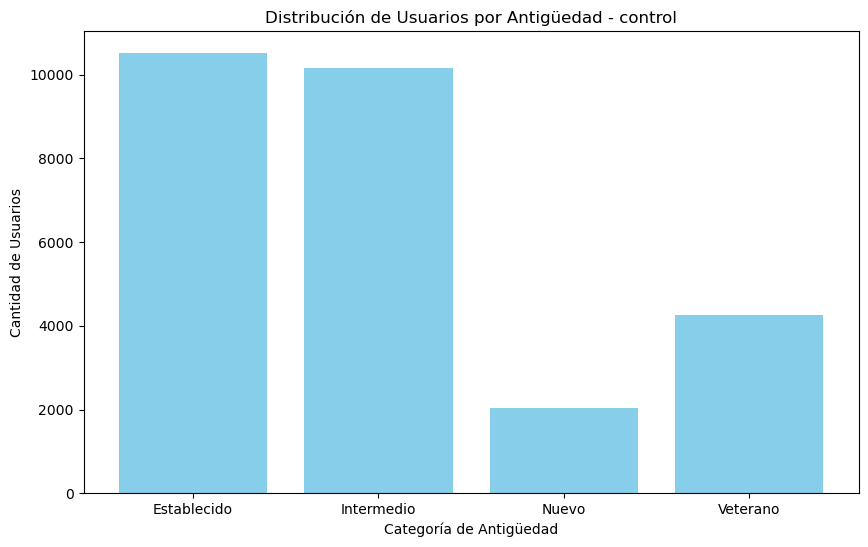

In [45]:
plt.figure(figsize=(10, 6))  
plt.bar(old_test_counts.index, old_test_counts.values, color='skyblue')

# Título y etiquetas a los ejes
plt.title('Distribución de Usuarios por Antigüedad - control')
plt.xlabel('Categoría de Antigüedad')
plt.ylabel('Cantidad de Usuarios')

# Mostrar la gráfica
plt.show()

In [46]:
num_test_accts_counts = df_test['num_accts'].value_counts().sort_index()
num_test_accts_counts

num_accts
0        7
1        1
2    21310
3     4696
4      840
5       97
6       13
7        4
Name: count, dtype: int64

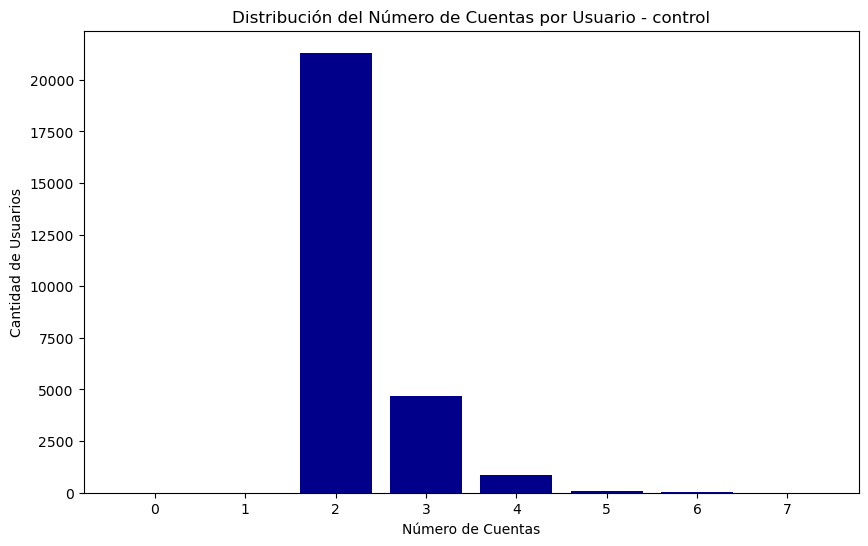

In [47]:
plt.figure(figsize=(10, 6))  
plt.bar(num_test_accts_counts.index, num_test_accts_counts.values, color='darkblue')  

# Título y etiquetas a los ejes
plt.title('Distribución del Número de Cuentas por Usuario - control')
plt.xlabel('Número de Cuentas')
plt.ylabel('Cantidad de Usuarios')

# Mejorar la visualización en el eje X
plt.xticks(range(0, max(num_ex_accts_counts.index)+1))  # Asegura que todos los números de cuentas aparezcan como ticks

# Mostrar la gráfica
plt.show()